In [2]:
### REQUIRED LIBRARIES
import numpy as np

In [3]:
### SETTING UP A NEURON LAYER

# 4 Inputs to 3 Neurons


# 4x1 Input layer
inputs = [1.0, 2.0, 3.0, 2.5]


# Each Neuron has a weight for each of the 4 Inputs
# w 3x4
weights = [
    [0.2, 0.8, -0.5, 1],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]


# Each Neuron has a Bias to add
# b 3x1
bias = [2.0, 3.0, 0.5]


# Output = w.X + b
# (3x4).(4x1) + (3x1) => Dimensionally Matches
output = np.dot(weights, inputs) + bias
output

array([4.8  , 1.21 , 2.385])

In [4]:
# SETTING UP A BATCH LAYER OF NEURON INPUT

# Input Layer = 3x4
inputs = [
    [1.0, 2.0, 3.0, 2.5],
    [2.0, 5.0, -1.0, 2.0],
    [-1.5, 2.7, 3.3, -0.8]
    ]


# Weights Array = 3x4
weights = [
    [0.2, 0.8, -0.5, 1.0],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
    ]

# Bias Array  = 3x1
biases = [2.0, 3.0, 0.5]

# Output = wT . X + b
#   3x4 . 4x3 + 3x1
#=> 3x3 + 3x1
#=> 3x3
layer_outputs = np.dot(inputs, np.array(weights).T) + biases
layer_outputs

array([[ 4.8  ,  1.21 ,  2.385],
       [ 8.9  , -1.81 ,  0.2  ],
       [ 1.41 ,  1.051,  0.026]])

In [5]:
### MULTILAYER NEURAL NETWORK

## LAYER 1
# 3x4
inputs1 = [
    [1, 2, 3, 2.5], 
    [2., 5., -1., 2], 
    [-1.5, 2.7, 3.3, -0.8]
    ]

# 3x4
weights1 = [
    [0.2, 0.8, -0.5, 1],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
    ]

# 3x4
biases1 = [2, 3, 0.5]

## LAYER 2
# 3x4
weights2 = [
    [0.1, -0.14, 0.5],
    [-0.5, 0.12, -0.33],
    [-0.44, 0.73, -0.13]
    ]

# 3x1
biases2 = [-1, 2, -0.5]


#############################3

# Layer 1 Output = Layer 2 Input
layer1_outputs = np.dot(inputs1, np.array(weights1).T) + biases1
print(layer1_outputs)

layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2
print(layer2_outputs)


[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]
[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


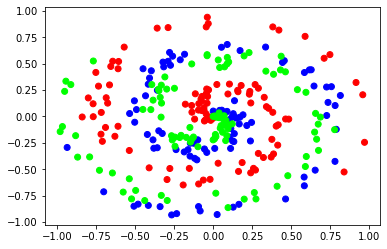

In [11]:
### USING SPIRAL DATA TO TRAIN THE NN
try:
    from nnfs.datasets import spiral_data
except:
    !pip install nnfs
    from nnfs.datasets import spiral_data

import nnfs
nnfs.init()

import matplotlib.pyplot as plt
X, y = spiral_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

In [17]:
### DENSE LAYER CLASS

class Layer_Dense:

    # LAYER INITIALIZATION
    def __init__(self, n_inputs, n_neurons):

        #Weights = #Inputs in Rows and  #Neurons in Columns
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

      
    # FORWARD PASS IN NN
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
        

X, y = spiral_data(samples = 100, classes = 3)
# print(X)
dense1 = Layer_Dense(2,3)
dense1.forward(X)

print(dense1.output)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-4.09905842e-05 -1.19643855e-05 -1.33108580e-04]
 [-1.69150138e-04 -6.01390821e-05 -1.00145277e-04]
 [-2.61410431e-04 -9.35375574e-05 -1.29884167e-04]
 [-3.84296931e-04 -1.40503063e-04 -6.60361256e-05]
 [-4.13875998e-04 -1.46472186e-04 -2.73229874e-04]
 [-6.75707357e-04 -2.65491806e-04  6.53323077e-04]
 [-7.84478732e-04 -3.01095191e-04  4.60914511e-04]
 [-9.03317996e-04 -3.49195325e-04  6.34510070e-04]
 [-7.63218850e-04 -2.71508092e-04 -4.45365877e-04]
 [-1.00331451e-03 -4.10223030e-04  1.63795310e-03]
 [-1.04219525e-03 -4.31296794e-04  1.91736151e-03]
 [-1.35792349e-03 -5.29281737e-04  1.13527442e-03]
 [-7.54515408e-04 -3.41348728e-04  2.60211248e-03]
 [-1.58292369e-03 -6.13342039e-04  1.17160461e-03]
 [-1.26690767e-03 -5.35712868e-04  2.80722510e-03]
 [-1.37950422e-03 -5.81155065e-04  2.96622841e-03]
 [-1.84761337e-03 -7.39268260e-04  2.34216824e-03]
 [-8.55956925e-04 -4.02952370e-04  3.60729243e-03]
 [ 8.84302717e-04  2.70042976e-